In [125]:
import warnings
warnings.filterwarnings('ignore')

# Life expectancy GDP

This is the second project on Codecademy Data Scientist: Machine Learning Career Path.

The given by Codeacademy dataset has been stored in __all_data.csv__.

Data has been taken from next sources: 
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.
- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

This project aims to examine the potential strong correlation between a country's economic output and the life expectancy of its citizens. The objectives include data preparation, conducting an analysis using visualizations, and interpreting the study's findings.

# Load data

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

First we import neсessary python libraries. To search for dependences between GDP and life expectancy load the datasets into DataFrames, what means we need Pandas. To evaluate and visualize our findings we may use Matplotlib and Seaborn as well.

Then we load __all_data.csv__ and read first rows by `.head()` to take a first look.

In [16]:
df = pd.read_csv("all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Checked info about our DataFrame we learned there are 96 records and 4 columns.

# Explore data

First let's learn more about the given data. Explore what values we have in the 'Country' and 'Year' columns.

In [65]:
print(df['Country'].unique())
print(df['Year'].unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


So here we have data from about 6 countries arranged from 2000 to 2015.

#### Small note about naming

We see that the third column has an absolutely descriptive name, but it will be not so comfortable to use such name in following analysis. So it would be better to rename the column to something shorter.

In [71]:
df = df.rename({"Life expectancy at birth (years)":"Expectation"}, axis = "columns")
df.head()

,Country,Year,Expectation,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


# Time tendency

Let's look at indicators such as life expectancy and GDP over time by country.

#### Life expectancy

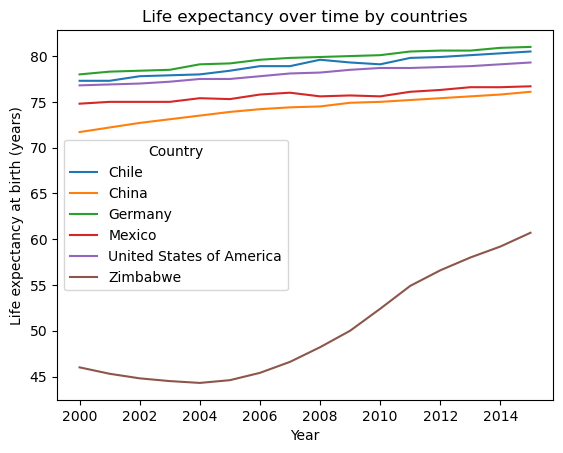

<Figure size 640x480 with 0 Axes>

In [127]:
sns.lineplot(x='Year', y='Expectation', hue='Country', data=df)
plt.ylabel('Life expectancy at birth (years)')
plt.title('Life expectancy over time by countries')
plt.show()
plt.clf()

We can observe that it seems to have an increasing life expectancy tendency. More for Zimbabwe and less for others, but still. Also, we can note that Chile and Mexico have decreasing periods of life expectancy. But the plot scale for all countries in time doesn't allow us to recognize all the details. It will be more recognizable if we draw different plots for every country.

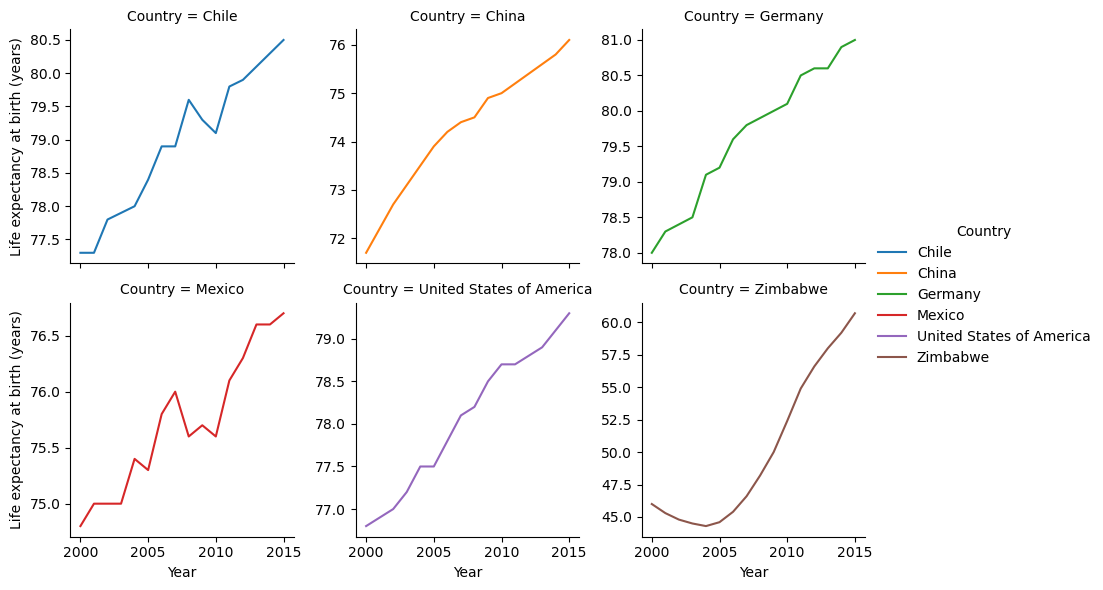

<Figure size 640x480 with 0 Axes>

In [163]:
graphLifeExpectancy = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphLifeExpectancy.map(sns.lineplot, 'Year', 'Expectation').add_legend().set_axis_labels("Year","Life expectancy at birth (years)")
plt.show()
plt.clf()

Without doubt, we can say that there is an increase in life expectancy over time for every country from a given ones. Chile and Mexico have decreasing periods for several years until 2010, after which life expectancy starts growing again. Zimbabwe had a decreasing tendency before about 2004 and then started growing.

#### GDP

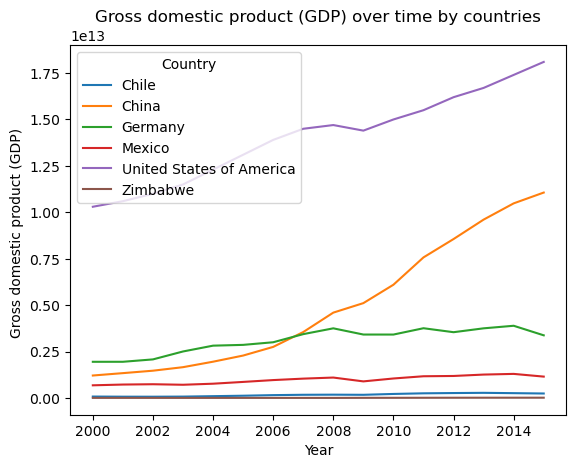

<Figure size 640x480 with 0 Axes>

In [131]:
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
plt.ylabel('Gross domestic product (GDP) ')
plt.title('Gross domestic product (GDP) over time by countries')
plt.show()
plt.clf()

Here we also can observe that it seems to have an increasing GDP tendency. But not from all countries. Obviously, USA and China have an increasing GDP tendency, Germany and Mexico have but it's not so clear. And for Chile and Zimbabwe this is hardly distinguishable. Also, we can note that USA, Germany and Mexico have decreasing periods of GDP. But like in previous time the plot scale for all countries in time doesn't allow us to recognize all the details. It will be more recognizable if we draw different plots for every country.

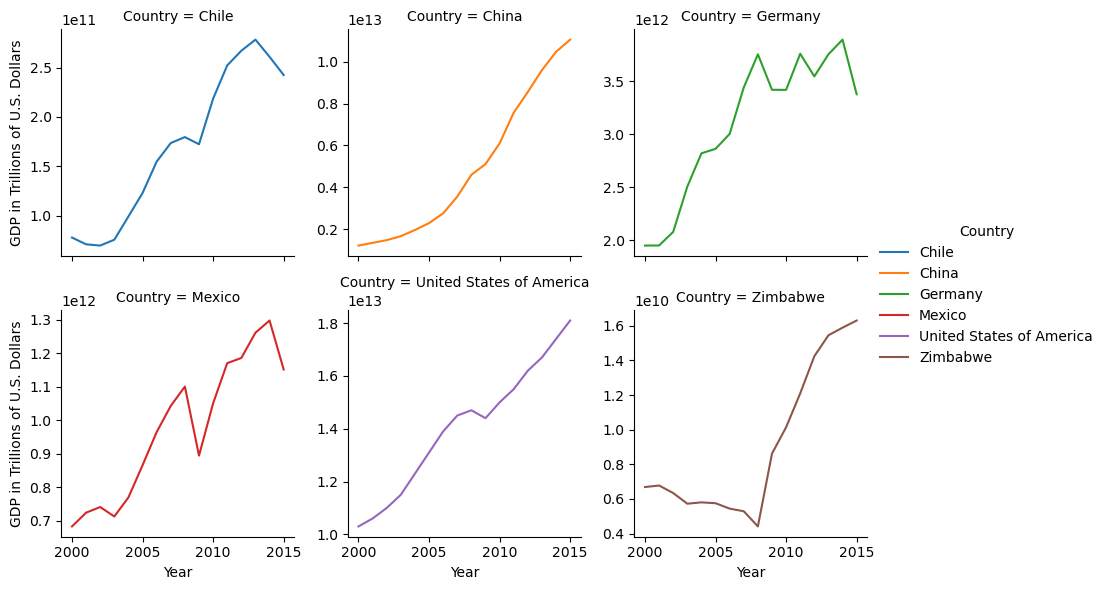

<Figure size 640x480 with 0 Axes>

In [161]:
graphGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)
graphGDP.map(sns.lineplot, 'Year', 'GDP').add_legend().set_axis_labels("Year", "GDP in Trillions of U.S. Dollars")
plt.show()
plt.clf()

Observing individual plots, we can clearly declare that every country has a positive GDP tendency and had more GDP in 2015 than in 2000. Also, we can note that sometime in 2008, Chile, Germany, Mexico and the USA started decreasing GDP but recovered and started growing again except Germany (It was the Great Recession). Interesting fact that the GDP of Zimbabwe decreased until about 2008 and started increasing that. China did not have any problems at all, only a slight decrease in growth rate.